## Plotting practice and some NLP (hopefully)

IMPORTANT NOTE:

subtitles in each season differ in terms of who the provider is. So, basically, there's no guarantee that SDH comments are consistent (each episode in each season has sounds / different sounds can be named differently)

# TO DO:
- find out how to make plotly show every bar on the plot
- for music graph with soundtrack add 1 min to every entry's interval_end for clearity

In [6]:
import re
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta, time

import plotly.express as px

In [234]:
data = pd.read_csv('sdh_comments.csv')

# changing string type to datetime
data.interval_start = pd.to_datetime(data.interval_start.str[0:8],format="%H:%M:%S")
data.interval_end = pd.to_datetime(data.interval_end.str[0:8],format="%H:%M:%S")

# this doesn't work with the plotly gantt chart down below
# data.interval_start = pd.to_datetime(data.interval_start.str[0:8],format="%H:%M:%S").dt.time
# data.interval_end = pd.to_datetime(data.interval_end.str[0:8],format="%H:%M:%S").dt.time

In [235]:
data.dtypes

sdh_comment                  object
interval_start       datetime64[ns]
interval_end         datetime64[ns]
interval_minute               int64
episode                       int64
season                        int64
season00episode00            object
dtype: object

Practicing on Season 1 data:

In [196]:
# choosing season 1 and comments containing "musik"
# later we'll make clusters for comments to display different types of sounds: clicks, peeps, thunder, music, radio and so on
data_s01e01 = data[(data.season==1) & (data.sdh_comment.str.lower().str.contains('musik'))]
# |klavierspiel|klänge
data_s01e01

,sdh_comment,interval_start,interval_end,interval_minute,episode,season,season00episode00
103,ruhige Klaviermusik,1900-01-01 00:00:06,1900-01-01 00:00:08,0,7,1,S01E07
105,ruhige spieluhrartige Musik,1900-01-01 00:00:17,1900-01-01 00:00:20,0,7,1,S01E07
106,Musik wird zunehmend dissonant,1900-01-01 00:00:27,1900-01-01 00:00:29,0,7,1,S01E07
110,ruhige beklemmende Musik,1900-01-01 00:02:39,1900-01-01 00:02:42,2,7,1,S01E07
111,Ruhige beklemmende Musik läuft weiter,1900-01-01 00:02:51,1900-01-01 00:02:53,2,7,1,S01E07
...,...,...,...,...,...,...,...
2433,düstere Musik,1900-01-01 00:29:39,1900-01-01 00:29:41,29,9,1,S01E09
2435,Musik verstummt,1900-01-01 00:29:59,1900-01-01 00:30:01,29,9,1,S01E09
2467,melancholische Musik,1900-01-01 00:40:46,1900-01-01 00:40:48,40,9,1,S01E09
2473,melancholische Musik,1900-01-01 00:45:51,1900-01-01 00:45:53,45,9,1,S01E09


In [197]:
fig = px.timeline(data_s01e01, x_start='interval_start',
                            x_end='interval_end',
                            y='season00episode00',
                            # color='sdh_comment',
                            text='sdh_comment'
                            # ,template="xgridoff"
                            ,template='plotly_dark'
                            ,color_discrete_sequence=["rgb(120,130,90)"]                            
                            ,hover_name="sdh_comment"
                            ,hover_data={'sdh_comment':False,'interval_end':False}
                            ,height=600
                            )

fig.update_xaxes(tickformat="%H:%M:%S",
                showgrid=True, griddash='dot', gridcolor='grey',
                rangeslider=dict(visible=True,
                # ,bgcolor="white"
                )
                ,rangeslider_thickness = 0.1 #fraction of the whole fig heigth
                )
# https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-rangeslider

fig.update_yaxes(autorange="reversed",categoryorder='category ascending')

# shapes were added in the background for more readability
for episode in data_s01e01.season00episode00.drop_duplicates():
    fig.add_hrect(y0=episode, y1=episode, line_width=30, fillcolor="black", opacity=0.03,layer="below")

fig.update_traces(textfont_size=8, textangle=0)
fig.update_layout(title="Music of Dark",xaxis_title="Time",yaxis_title="Episode",bargap=0,
                font_family="Courier New",
                font_color="white",
                # title_font_family="Times New Roman",
                # title_font_color="white"
                )
fig.show()

In [198]:
# idea: make color=season, plot based on episode number only
data = data[data.sdh_comment.str.lower().str.contains('musik')]
data.episode = data.episode.astype('str')
data.season = data.season.astype('str')
# |klavierspiel|klänge
data

,sdh_comment,interval_start,interval_end,interval_minute,episode,season,season00episode00
0,düster-melancholische Musik,1900-01-01 00:00:13,1900-01-01 00:00:16,0,2,3,S03E02
6,düstere Musik,1900-01-01 00:01:41,1900-01-01 00:01:46,1,2,3,S03E02
18,bedrohliche Streichermusik,1900-01-01 00:06:39,1900-01-01 00:06:43,6,2,3,S03E02
46,düstere Musik,1900-01-01 00:20:23,1900-01-01 00:20:27,20,2,3,S03E02
94,Musik verstummt,1900-01-01 00:48:14,1900-01-01 00:48:15,48,2,3,S03E02
...,...,...,...,...,...,...,...
2433,düstere Musik,1900-01-01 00:29:39,1900-01-01 00:29:41,29,9,1,S01E09
2435,Musik verstummt,1900-01-01 00:29:59,1900-01-01 00:30:01,29,9,1,S01E09
2467,melancholische Musik,1900-01-01 00:40:46,1900-01-01 00:40:48,40,9,1,S01E09
2473,melancholische Musik,1900-01-01 00:45:51,1900-01-01 00:45:53,45,9,1,S01E09


In [199]:
from matplotlib.pyplot import legend


fig = px.timeline(data, x_start='interval_start',
                            x_end='interval_end',
                            y='episode',
                            color='season',
                            text='sdh_comment'
                            # ,template="xgridoff"
                            ,template='plotly_dark'
                            ,color_discrete_map={"3":"rgb(179,205,227)","2":"rgb(36,121,108)","1":"rgb(153,153,51)"}
                            ,category_orders={"season": ["1", "2", "3"],"episode": ["10","9","8","7","6","5","4","3","2","1"]}                            
                            ,hover_name="sdh_comment"
                            ,hover_data={'sdh_comment':False,'interval_end':False}
                            ,height=700
                            )

fig.update_xaxes(tickformat="%H:%M:%S",
                showgrid=True, griddash='dot', gridcolor='grey',
                rangeslider=dict(visible=True,
                # ,bgcolor="white"
                )
                ,rangeslider_thickness = 0.1 #fraction of the whole fig heigth
                )
# https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-rangeslider

fig.update_yaxes(autorange="reversed"
                # ,categoryorder='category ascending'
                )

# shapes were added in the background for more readability
for episode in range(0,10):
    fig.add_hrect(y0=episode, y1=episode, line_width=30, fillcolor="black", opacity=0.03,layer="below")

fig.update_traces(textfont_size=8, textangle=0,textposition="none")
fig.update_layout(title="Music of Dark",xaxis_title="Time",yaxis_title="Episode",legend_title="Season",bargap=0,
                font_family="Courier New",
                font_color="white",
                # title_font_family="Times New Roman",
                # title_font_color="white"
                )
fig.show()

In [257]:
data = pd.read_csv('sdh_comments.csv')
# changing string type to datetime
data.interval_start = pd.to_datetime(data.interval_start.str[0:8],format="%H:%M:%S")
data.interval_end = pd.to_datetime(data.interval_end.str[0:8],format="%H:%M:%S")


data = data[(data.sdh_comment.str.startswith('Lied:')) & (~data.sdh_comment.str.contains('Goodbye'))]
# data[data.sdh_comment.str.contains('Goodbye')]
data.episode = data.episode.astype('str')
data.season = data.season.astype('str')
data.interval_end = data.interval_end + timedelta(seconds=45)
data

,sdh_comment,interval_start,interval_end,interval_minute,episode,season,season00episode00
11,"Lied: ""You Spin Me 'Round"" von Dead or Alive",1900-01-01 00:05:08,1900-01-01 00:05:56,5,2,3,S03E02
93,"Lied: ""Is This Love"" von Survivor",1900-01-01 00:48:03,1900-01-01 00:48:50,48,2,3,S03E02
95,"Lied: ""Broken Sleep"" von Obel",1900-01-01 00:48:45,1900-01-01 00:49:33,48,2,3,S03E02
116,"Lied: ""I Ran"" von A Flock of Seagulls",1900-01-01 00:05:19,1900-01-01 00:06:07,5,7,1,S01E07
313,"Lied: ""Ent One"" von Sol Seppy",1900-01-01 00:40:56,1900-01-01 00:41:43,40,6,1,S01E06
492,"Lied: ""Bad Kingdom"" von May und Robot Koch",1900-01-01 00:49:04,1900-01-01 00:49:51,49,1,3,S03E01
564,"Lied: ""Keep the Streets Empty For Me"" von Fev Ray",1900-01-01 00:38:06,1900-01-01 00:38:54,38,4,1,S01E04
664,"Lied: ""A Quiet Life"" von Teho Teardo & Blixa B...",1900-01-01 00:45:22,1900-01-01 00:46:11,45,10,1,S01E10
742,"Lied: ""Wenn ich dich seh"" von Detlev Lais",1900-01-01 00:04:55,1900-01-01 00:05:43,4,4,3,S03E04
799,"Lied: ""The Labyrinth Song"" von Asaf Avidan",1900-01-01 00:53:53,1900-01-01 00:54:40,53,4,3,S03E04


In [258]:
from matplotlib.pyplot import legend


fig = px.timeline(data, x_start='interval_start',
                            x_end='interval_end',
                            y='season00episode00',
                            # color='season',
                            text='sdh_comment'
                            # ,template="xgridoff"
                            ,template='plotly_dark'
                            # ,color_discrete_map={"3":"rgb(179,205,227)","2":"rgb(36,121,108)","1":"rgb(153,153,51)"}
                            ,color_discrete_sequence=["rgb(120,130,90)"]  
                            # ,category_orders={"season": ["1", "2", "3"],"episode": ["10","9","8","7","6","5","4","3","2","1"]}                            
                            ,hover_name="sdh_comment"
                            ,hover_data={'sdh_comment':False,'interval_end':False}
                            ,height=800
                            )

fig.update_xaxes(tickformat="%H:%M:%S",
                showgrid=False, griddash='dot', gridcolor='grey',
                rangeslider=dict(visible=True,
                # ,bgcolor="white"
                )
                ,rangeslider_thickness = 0.1 #fraction of the whole fig heigth
                )
# https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-rangeslider

fig.update_yaxes(autorange="reversed"
                ,categoryorder='category ascending'
                )

# shapes were added in the background for more readability
for episode in data.season00episode00.drop_duplicates():
    fig.add_hrect(y0=episode, y1=episode, line_width=10, fillcolor="black", opacity=0.03,layer="below")

fig.update_traces(textfont_size=8, textangle=0
                # ,textposition="none"
                )
fig.update_layout(title="Music of Dark",xaxis_title="Time",yaxis_title="Episode",legend_title="Season",bargap=0,
                font_family="Courier New",
                font_color="white",
                # title_font_family="Times New Roman",
                # title_font_color="white"
                )
fig.show()

Not every episode contains comment with soundtrack (which is strange). However, it would be nice to add empty rows for such cases... 

# ENOUGH WITH THE GRAPHS

Now, let's go back to the idea of clustering the comments or something

*Ideas*

- look at what sorts of music is used in the series (ominous, dark, melancholic, and so on)
- cluster comments in some way, I'm assuming there will be categories like sounds, movements, human and animal noize
- 

In [15]:
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

stemmer = SnowballStemmer("german")
stop_words = set(stopwords.words("german"))

import fasttext
import fasttext.util

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/thomasniets/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thomasniets/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
data = pd.read_csv('sdh_comments.csv')

# changing string type to datetime
data.interval_start = pd.to_datetime(data.interval_start.str[0:8],format="%H:%M:%S")
data.interval_end = pd.to_datetime(data.interval_end.str[0:8],format="%H:%M:%S")

# contains soundtrack titles - no need to include them
data = data[~data.sdh_comment.str.contains('Lied:|Radio:')]

Pre-processing part

In [76]:
# stolen from https://data-dive.com/binary-text-classification-predict-ratings-part2-lstm-neural-networks

def clean_text(text, for_embedding=False):
    """
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    # text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            stemmer.stem(word) for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean

In [77]:
data["comment_clean"] = data.sdh_comment.map(
    lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x
)

In [78]:
# didn't change much but still
data.head(30)

,sdh_comment,interval_start,interval_end,interval_minute,episode,season,season00episode00,comment_clean
0,düster-melancholische Musik,1900-01-01 00:00:13,1900-01-01 00:00:16,0,2,3,S03E02,duster-melanchol musik
1,rhythmisches Klopfen,1900-01-01 00:00:24,1900-01-01 00:00:30,0,2,3,S03E02,rhythmisch klopf
2,bedrohliche Klänge,1900-01-01 00:00:24,1900-01-01 00:00:30,0,2,3,S03E02,bedroh klang
3,keucht,1900-01-01 00:00:36,1900-01-01 00:00:38,0,2,3,S03E02,keucht
4,unheilvolle Klänge,1900-01-01 00:00:43,1900-01-01 00:00:46,0,2,3,S03E02,unheilvoll klang
5,Donnergrollen,1900-01-01 00:00:52,1900-01-01 00:00:56,0,2,3,S03E02,donnergroll
6,düstere Musik,1900-01-01 00:01:41,1900-01-01 00:01:46,1,2,3,S03E02,dust musik
7,schluchzt,1900-01-01 00:03:02,1900-01-01 00:03:03,3,2,3,S03E02,schluchzt
9,Vögel krächzen,1900-01-01 00:04:48,1900-01-01 00:04:50,4,2,3,S03E02,vogel krachz
10,Radioweck geht an,1900-01-01 00:05:07,1900-01-01 00:05:08,5,2,3,S03E02,radioweck geht


Using fasttext for the first time in my life...

In [20]:
ft = fasttext.load_model('cc.de.100.bin')
ft.get_dimension()

100

In [24]:
ft.get_nearest_neighbors('Klänge', k=10)

[(0.8587203025817871, 'Melodien'),
 (0.8377193808555603, 'Klangbilder'),
 (0.835591733455658, 'Rhythmen'),
 (0.8290804028511047, 'Töne'),
 (0.8289994597434998, 'Gesänge'),
 (0.8109382390975952, 'Instrumentalklänge'),
 (0.7979246973991394, 'Klangwelt'),
 (0.7945135235786438, 'Klangwelten'),
 (0.7942068576812744, 'Orgelklänge'),
 (0.7924883365631104, 'Vogelgesänge')]

In [25]:
ft.get_sentence_vector("Anrufbeantwort geht an")

array([-0.17179117, -0.26975116, -0.08374375, -0.00777096,  0.00420273,
        0.02643383, -0.13640258, -0.02973005, -0.05990611,  0.2025139 ,
        0.01693577, -0.01321878, -0.00101834, -0.0188795 ,  0.04341538,
        0.04042927,  0.04674643,  0.0164745 ,  0.10279604, -0.05811954,
       -0.00676742, -0.01117609,  0.00822983,  0.11304042,  0.01918871,
        0.01785533,  0.20986   ,  0.06923518, -0.07162045, -0.00299065,
        0.00375151, -0.01788118,  0.05964101,  0.08058061, -0.0102348 ,
        0.03221216, -0.0559687 ,  0.01863766,  0.00169736, -0.02255843,
       -0.07648599, -0.03362284, -0.01002038,  0.00953537,  0.00268058,
        0.0420376 ,  0.05012373,  0.00368481, -0.02674728, -0.0368387 ,
        0.03908971, -0.00531279,  0.01350986,  0.03076131, -0.03259069,
        0.03880915,  0.04361637, -0.02155104, -0.10576221,  0.06816242,
       -0.09673615,  0.01197422,  0.04383635, -0.00599292,  0.05194471,
        0.02057904, -0.02234669,  0.02599323,  0.0030702 , -0.02

In [79]:
data["ft_vectors"] = data["comment_clean"].apply(lambda x: ft.get_sentence_vector(x))

Thank you good man from github

https://github.com/ignasiusharvey/text_clustering/blob/master/text_clustering.ipynb

In [70]:
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt 

In [80]:
sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pd.DataFrame(data["ft_vectors"].values.tolist()))
    sum_of_squared_distances.append(km.inertia_)

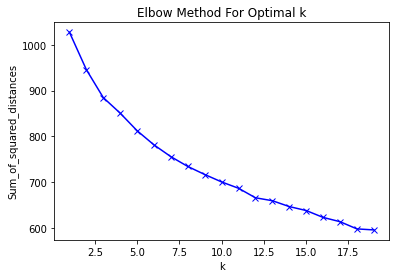

In [81]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.show()

In [82]:
kmeans = KMeans(n_clusters=12)  
kmeans.fit(data['ft_vectors'].values.tolist())

KMeans(n_clusters=12)

In [83]:
data['cluster'] = kmeans.fit_predict(data['ft_vectors'].values.tolist())

In [84]:
data.cluster.value_counts()

0     381
8     371
2     368
1     350
5     263
10    161
3     141
9     131
7      75
6      73
4      71
11     57
Name: cluster, dtype: int64

In [85]:
list(data.query('cluster==4').sdh_comment.drop_duplicates())

['Donnergrollen', 'Piepton', 'Pieptöne', 'Signalton']

In [87]:
list(data.query('cluster==11').sdh_comment.drop_duplicates())

['keucht',
 'keucht ängstlich',
 'keucht nervös',
 'ängstliches Keuchen',
 'keucht panisch',
 'keucht laut',
 'Keuchen',
 'keucht angestrengt',
 'keuchen',
 'keucht und ächzt',
 'keucht aufgeregt',
 'keucht heftig',
 'keucht erschöpft',
 'keucht verzweifelt',
 'atmet keuchend']

In [89]:
list(data.query('cluster==7').sdh_comment.drop_duplicates())

['leise',
 'leises Rascheln',
 'Gerät piept leise',
 'leises Rauschen',
 'Gerät surrt leise',
 'leises Stimmengewirr',
 'keucht leise',
 'leises Zischeln',
 'stöhnt leise',
 'leises Knarren',
 'Wind rauscht leise',
 'leises Klopfen',
 'Handy vibriert leise',
 'lacht leise auf',
 'lacht leise',
 'leise Popmusik',
 'leises Blubbern',
 'schluchzt leise',
 'leises Lachen',
 'leises Surren',
 'leises  dumpfes Hämmern',
 'leises Ticken',
 'leises Klappern und Dröhnen',
 'leises Stöhnen',
 'leises Rattern',
 'leises Knacken',
 'erzählt   leise etwas',
 'leises Rasseln',
 'leises Klappern und Plätschern',
 'leises Surren  Klappern',
 'Bremsen quietschen leise']

In [90]:
list(data.query('cluster==6').sdh_comment.drop_duplicates())

['bedrohliches Dröhnen',
 'tosendes Dröhnen',
 'dumpfes Dröhnen',
 'unheimliches  leises Dröhnen',
 'dumpfes  metallisches Dröhnen',
 'Dröhnen  laut Schrei',
 'leises  dumpfes Dröhnen',
 'unheimliches Dröhnen',
 'Dröhnen verstummt',
 'lautes Dröhnen  Krachen',
 'lautes Dröhnen',
 'leises  blechernes Dröhnen',
 'unheilvolles Dröhnen',
 'Dröhnen',
 'kurzes Dröhnen',
 'metallisches Dröhnen',
 'dröhnendes Brausen',
 'Dröhnen und Brausen',
 'Dröhnen wird lauter',
 'lautes  surrendes Dröhnen',
 'lautes  hallendes Dröhnen',
 'elektronisches Dröhnen',
 'spannungsvolles Dröhnen',
 'Brausen  Dröhnen',
 'dumpfes  hämmerndes Dröhnen',
 'dröhnendes Heulen',
 'düsteres Dröhnen',
 'knisterndes Dröhnen',
 'mysteriöses Dröhnen',
 'Flieg dröhnt',
 'dumpfes Dröhnen in d Ferne',
 'Rattern und Dröhnen',
 'leises Dröhnen',
 'unheimliches  dumpfes Dröhnen',
 'dumpfes  krachendes Dröhnen',
 'Ticken  leises Dröhnen']

In [92]:
list(data.query('cluster==3').sdh_comment.drop_duplicates())

['düstere Musik',
 'düstere Klänge',
 'düstere Klänge  Ticken',
 'düstere  pulsierende Musik',
 'Lied aus dem Radio',
 'düsteres Surren',
 'düstere  dissonante Klänge',
 'düstere  melancholische Musik',
 'leise  düstere Musik',
 'leise  düstere Klänge',
 'düstere Streicherklänge',
 'düstere elektronische Klänge']

In [95]:
list(data.query('cluster==1').sdh_comment.drop_duplicates())

['heulende Sirene in d Ferne',
 'Stille',
 'Schritte',
 'Wind heult',
 'Poltern von oben',
 'atmet panisch',
 'schreit auf',
 'Schlüssel dreht sich im Schloss',
 'schlurfende Schritte',
 'schreit',
 'dumpfe Schreie',
 'Schritte nähern sich',
 'schnappt nach Luft',
 'Gerät piept schnell',
 'Piepen wird langsamer',
 'Ruhige  beklemmende Musik läuft weiter',
 'Piepen wird schneller',
 'hektisches Piepen',
 'atmet schwer',
 'schniefend',
 'dumpfes Grollen',
 'Wind rauscht',
 'kurzes  lautes Krachen',
 'Knochen knacken',
 'entferntes Knacken',
 'Vögel schreien',
 'dissonantes  laut werdendes Summen',
 'kurzes Klicken',
 'Es klopft lautstark',
 'Es klopft erneut heftig',
 'Es donnert',
 'Gerät knackt langsam',
 'Gerät knackt schneller',
 'Knacken wird schneller',
 'schnelles Knacken',
 'Gerät knackt schnell',
 'laut werdendes Ticken',
 'dumpf Aufprall',
 'polternde Schritte',
 'erneutes Klingeln',
 'ungläubig',
 'atmet tief ein',
 'Klänge steigern sich zu einem Surren',
 'Autotür fällt zu',


In [96]:
list(data.query('cluster==8').sdh_comment.drop_duplicates())

['düster-melancholische Musik',
 'Musik verstummt',
 'ruhige  spieluhrartige Musik',
 'Musik wird zunehmend dissonant',
 'ruhige  beklemmende Musik',
 'Die Musik spielt weiter',
 'sphärische Musik',
 'Sphärische Musik läuft weiter',
 'melancholische Musik',
 'bedrohliche Musik',
 'sphärisch  sakral Gesang',
 'traurige Musik',
 'geheimnisvolle Musik',
 'spannungsvolle Musik',
 'unheilvolle Musik',
 'Bedrohliche Musik steigert sich',
 'Lied verstummt',
 'rhythmisch A-cappella-Gesang',
 'leise Musik von unten',
 'ruhige  rätselhafte Musik',
 'bedrückende Musik',
 'leise  geheimnisvolle Musik',
 'angespannte Musik',
 'beklemmende Musik',
 'dramatisches Geräusch',
 'Lied verklingt',
 'triste Musik',
 'finstere Musik',
 'spannungsvolle  langsame Musik',
 'Spannungsvolle Musik wird langsam lauter',
 'Spannungsvolle Musik steigert sich',
 'spannungsgeladene Musik',
 'unheimliche Musik',
 'spannungsvolles Ticken',
 'spannungsvolle  elektronische Musik',
 'bedrückend polyphon Gesang',
 'Polyphon

In [97]:
list(data.query('cluster==0').sdh_comment.drop_duplicates())

['rhythmisches Klopfen',
 'Vögel krächzen',
 'Sirene heult',
 'Soldat',
 'Hubschrauberlärm von draußen',
 'Hund winselt',
 'Seufzer',
 'blechern Knall',
 'Knacken',
 'laut werdendes  metallisches Ticken',
 'Tor fällt zu',
 'Popmusik aus dem Autoradio',
 'leises Dröhnen  metallisches Ticken',
 'gleichmäßiges Piepen',
 'Ticken',
 'Sphärisch Gesang läuft weiter',
 'Poltern',
 'Mailbox',
 'Stöhnen',
 'blechernes Pochen',
 'metallisches Poltern',
 'Uhr tickt',
 'Tür knallt zu  Glas klirrt',
 'Pferd wiehert',
 'Pferd schnaubt',
 'Hunde bellen',
 'stöhnen und ächzen',
 'Regen prasselt',
 'Äste knacken',
 'Rattern  Quietschen',
 'elektronisches Blubbern',
 'Blubbern',
 'dumpfes Pochen',
 'Ticken und Knacken',
 'Zischen',
 'Ticken und Hämmern',
 'Surren und Piepen',
 'dumpfes Donnern  Klirren',
 'Sirren',
 'Sirren  leises Rattern',
 'Gong',
 'Wind heult leise',
 'üb Lautsprecher',
 'Rascheln  Knacken',
 'Kilian',
 'heulen wie Wölfe',
 'beide keuchen',
 'Grollen',
 'Grollen hört auf',
 'elektris

In [98]:
list(data.query('cluster==2').sdh_comment.drop_duplicates())

['Radioweck geht an',
 'Hundegebell',
 'Anrufbeantwort geht an',
 'bedrohliche Streichermusik',
 'Kirchenglocken läuten',
 'flüstert',
 'Raunen und Flüstern',
 'Radiosprecherin',
 'röchelt',
 'Geigerzähl knackt',
 'Fluglärm',
 'alt',
 'Pausensignal ertönt',
 'Mädchen',
 'Geigerzähl rattert',
 'Rattern wird stärker',
 'Gemurmel',
 'melancholische Streicherklänge',
 'ächzt',
 'Lampen surren',
 'ruhige Klaviermusik',
 'stöhnt',
 'stumme Szene',
 'Schulgong ertönt',
 'Türsumm ertönt',
 'auflachend',
 'murmelt unverständlich',
 'Schlagermusik aus dem Autoradio',
 'Handbremse schnarrt',
 'Pflegerin',
 'brüllt',
 'Stimmengewirr',
 'unverständlich',
 'Motorgeräusche',
 'Freizeichen ertönt',
 'Kurzwahltöne',
 'Besetztzeichen',
 'Freizeichen',
 'bedrohliche  dröhnende Klänge',
 'dröhnende und sphärische Klänge',
 'Schrubben',
 'Dielen knarren',
 'unverständliche  entfernte Kinderstimme',
 'unverständliches Murmeln',
 'Besetztzeichen ertönt',
 'Radiomoderator',
 'dissonantes  laut werdendes Surre